In [1]:
import pandas as pd
import numpy as np
import scipy.integrate as integrate

from datetime import date

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import matplotlib.pylab as plt # plotting
import plotly.graph_objs as go
import seaborn as sns

import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Customer%20Personality%20Analysis/marketing_campaign.csv", sep="\t")
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
today = date.today()

df['age'] = today.year - df['Year_Birth']
df['children'] = df['Kidhome'] + df['Teenhome']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['seniority'] = today.year - df['Dt_Customer'].dt.year

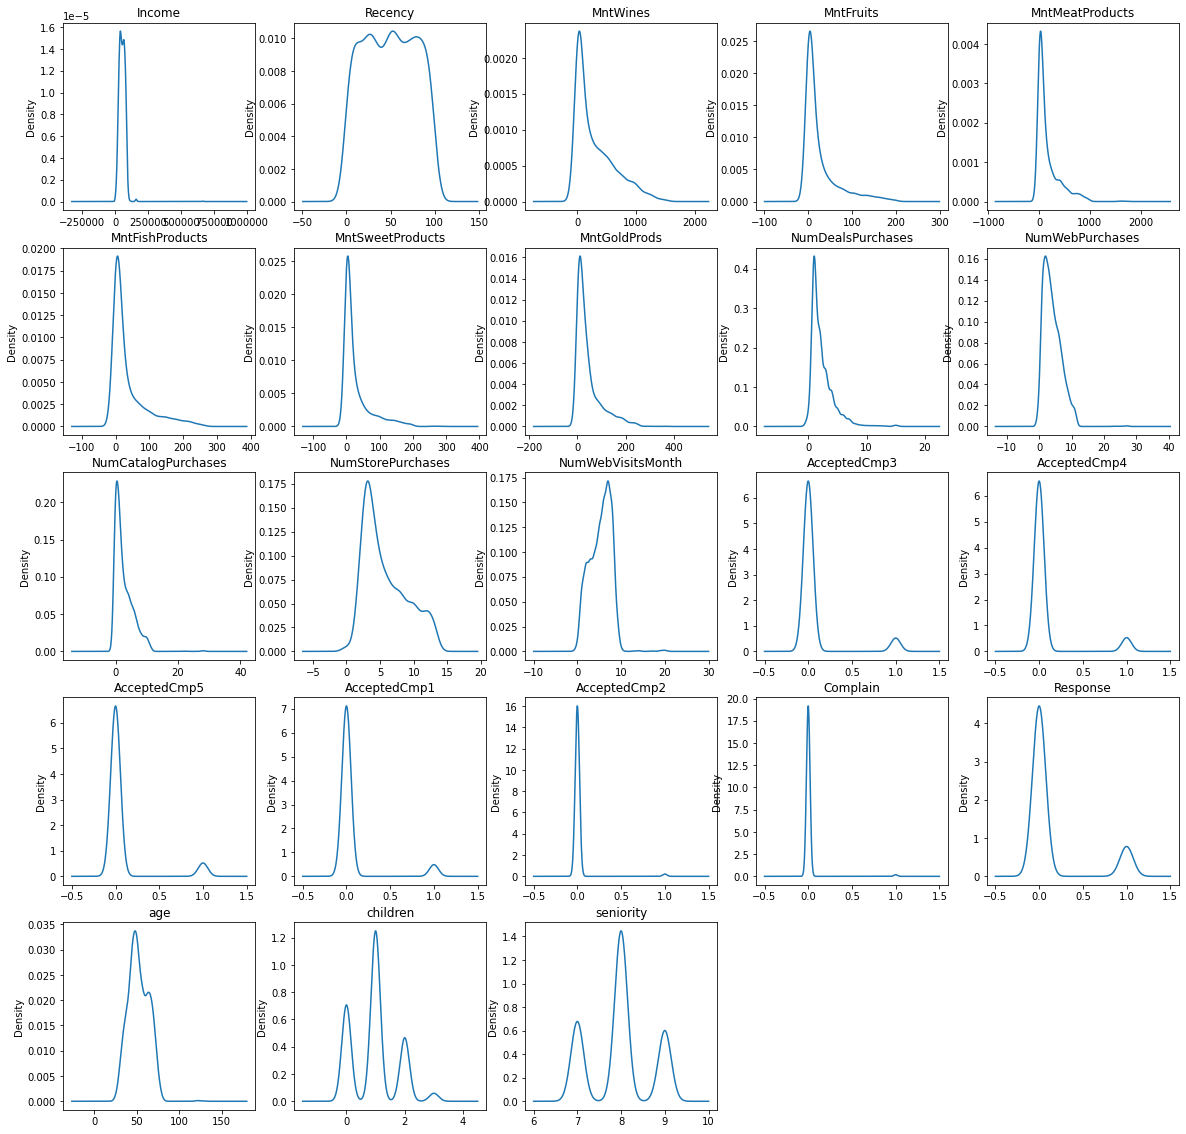

In [5]:
plt.figure(figsize=(20,20))
filter_out = [
 'ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 #'AcceptedCmp3',
 #'AcceptedCmp4',
 #'AcceptedCmp5',
 #'AcceptedCmp1',
 #'AcceptedCmp2',
 #'Complain',
 'Z_CostContact',
 'Z_Revenue',
 #'Response'
]
# select columns with numeric values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

# drop by Name
num_df = num_df.drop(filter_out, axis=1)
columns = num_df.columns.to_list()
for i,column in enumerate(columns):
    i += 1
    plt.subplot(5,5,i)
    num_df[column].plot.kde()
    plt.title(column)
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

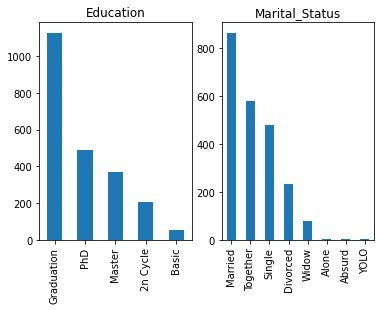

In [7]:
cat_df = df.select_dtypes(include=["object"])   
columns = cat_df.columns.to_list()

for i,column in enumerate(columns):
    i += 1
    plt.subplot(1,2,i)
    cat_df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [8]:
num_df.columns.to_list()

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'age',
 'children',
 'seniority']

In [9]:
df['sum_promotions'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['accepted_promotions'] = np.where(df['sum_promotions']>=1, 1, 0)


to_drop = [
 'ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Z_CostContact',
 'Z_Revenue',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'sum_promotions'
]

df.drop(columns=to_drop, inplace=True)

df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
age                     0
children                0
seniority               0
accepted_promotions     0
dtype: int64

In [10]:
df.dropna(subset=['Income'], inplace=True)
df = df[df.age <= 100]
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO']), 'other', df['Marital_Status'])

In [11]:
encoder = OrdinalEncoder(categories=[['Basic','2n Cycle', 'Graduation', 'Master', 'PhD']])

df[['Education_encoded']] = encoder.fit_transform(df[['Education']])
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,children,seniority,accepted_promotions,Education_encoded
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,9,1,2.0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,67,2,7,0,2.0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,8,0,2.0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,7,0,2.0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,7,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,54,1,8,0,2.0
2236,PhD,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,75,3,7,1,4.0
2237,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,40,0,7,1,2.0
2238,Master,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,65,1,7,0,3.0


In [12]:
num_df = df.select_dtypes(include=numerics)
d = {}
for col in num_df.columns.to_list():
    diff = max(num_df[col]) - min(num_df[col])
    d[col] = diff
d

{'Income': 664936.0,
 'Recency': 99,
 'MntWines': 1493,
 'MntFruits': 199,
 'MntMeatProducts': 1725,
 'MntFishProducts': 259,
 'MntSweetProducts': 262,
 'MntGoldProds': 321,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 27,
 'NumCatalogPurchases': 28,
 'NumStorePurchases': 13,
 'NumWebVisitsMonth': 20,
 'age': 56,
 'children': 3,
 'seniority': 2,
 'accepted_promotions': 1,
 'Education_encoded': 4.0}

In [13]:
num_df = df.select_dtypes(include=numerics)
d = {}
for col in num_df.columns.to_list():
    diff = max(num_df[col]) - min(num_df[col])
    d[col] = diff
d

{'Income': 664936.0,
 'Recency': 99,
 'MntWines': 1493,
 'MntFruits': 199,
 'MntMeatProducts': 1725,
 'MntFishProducts': 259,
 'MntSweetProducts': 262,
 'MntGoldProds': 321,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 27,
 'NumCatalogPurchases': 28,
 'NumStorePurchases': 13,
 'NumWebVisitsMonth': 20,
 'age': 56,
 'children': 3,
 'seniority': 2,
 'accepted_promotions': 1,
 'Education_encoded': 4.0}

In [14]:
col2bin = list({k: v for k, v in d.items() if v > 10}.keys())
colnot2bin = list({k: v for k, v in d.items() if v <= 10}.keys())
df[colnot2bin].head(2)

,children,seniority,accepted_promotions,Education_encoded
0,0,9,1,2.0
1,2,7,0,2.0


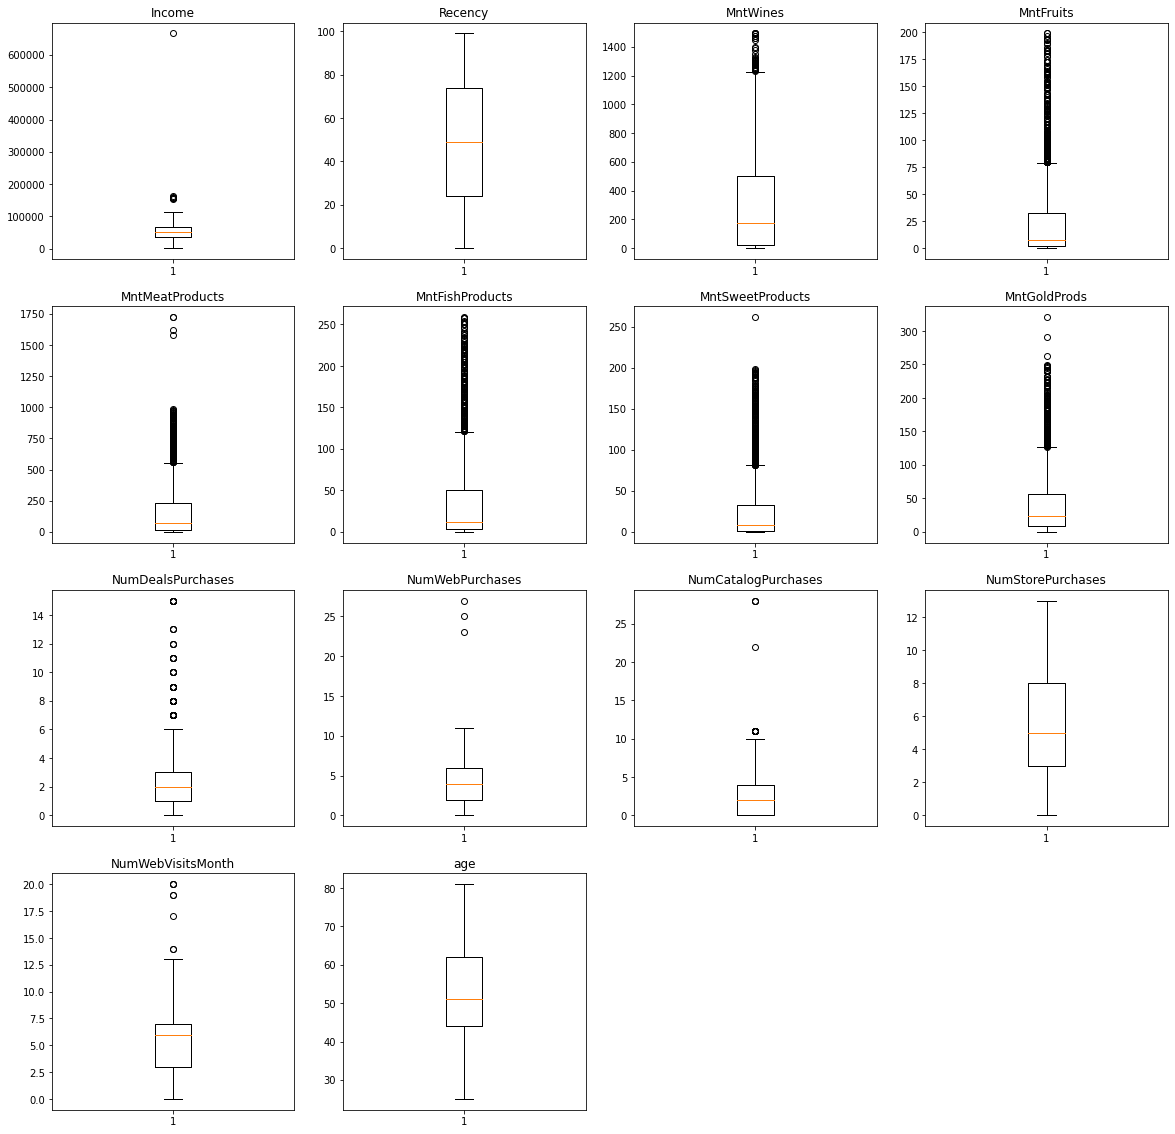

In [15]:
plt.figure(figsize=(20,20))
for i,column in enumerate(col2bin):
    i += 1
    plt.subplot(4,4,i)
    plt.boxplot(df[column])
    plt.title(column)